#Diabetes

###Paquetes que utilizaremos: 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder 

###Carga de base de datos

In [64]:
df=pd.read_csv('C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/otros/diabetes.csv')

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##EDA

In [66]:
df.shape

(768, 9)

In [67]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [68]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [69]:
# Contar la cantidad de ceros en cada columna
zero_counts = (df == 0).sum()

# Mostrar el resultado
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [70]:
# Eliminar filas donde las columnas 'Glucose' o 'BMI' tengan un valor de 0
df_cleaned = df[(df['Glucose'] != 0) & (df['BMI'] != 0)]

# Mostrar el DataFrame resultante
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df_cleaned.shape

(752, 9)

###Correlación

In [72]:
correlation_matrix = df_cleaned.corr()
outcome_correlation = correlation_matrix['Outcome']
outcome_correlation_sorted = outcome_correlation.sort_values(ascending=False)
print(outcome_correlation_sorted)

Outcome                     1.000000
Glucose                     0.494190
BMI                         0.309884
Age                         0.232734
Pregnancies                 0.213371
DiabetesPedigreeFunction    0.178052
Insulin                     0.130203
SkinThickness               0.069674
BloodPressure               0.050964
Name: Outcome, dtype: float64


<Axes: >

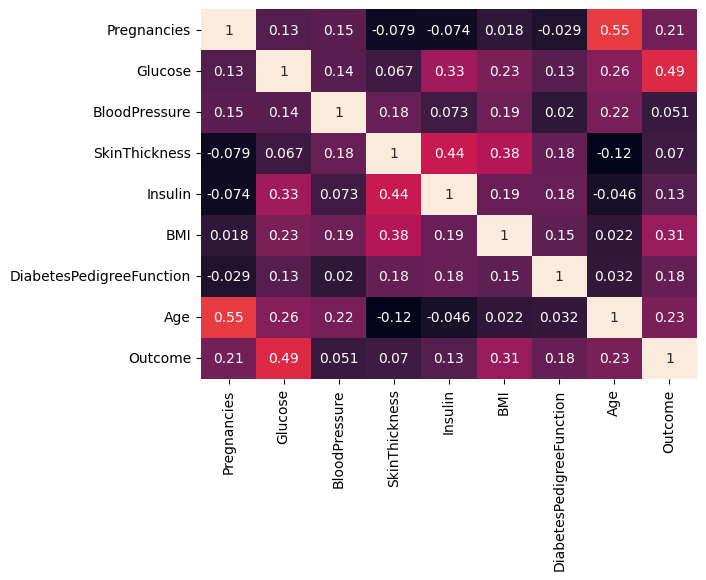

In [73]:
sns.heatmap(df_cleaned.iloc[:,].corr(), annot=True, cbar=False) 

###Selección de atributos para el modelo

In [74]:
X = df_cleaned[['Glucose', 'BMI']] 

In [75]:
y=df_cleaned['Outcome']

In [76]:
X = X.values

In [77]:
y = y.values

In [78]:
X,y

(array([[148. ,  33.6],
        [ 85. ,  26.6],
        [183. ,  23.3],
        ...,
        [121. ,  26.2],
        [126. ,  30.1],
        [ 93. ,  30.4]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1

###Split Dataset

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [80]:
print('Cantidad de datos para entrenamiento: ', len(X_train))
print('Cantidad de datos para test: ', len(X_test))

Cantidad de datos para entrenamiento:  526
Cantidad de datos para test:  226


##Regresión Logística

In [81]:
classifier = LogisticRegression()

In [82]:
classifier.fit(X_train, y_train)

LogisticRegression()

###El objeto classifier contiene el modelo ya entrenado. Sus parámetros son: $$ h(x) = \frac{1}{1 + e^{-(w_0 + w_1 x_1 + w_2 x_2)}}$$

In [83]:
print('Vector de coeficientes de la función lineal: ', classifier.coef_)
print('Ordenada en el origen (W0): ', classifier.intercept_)

Vector de coeficientes de la función lineal:  [[0.03713226 0.08007203]]
Ordenada en el origen (W0):  [-7.87541263]


###Ahora se va a corroborar como funciona el modelo con los datos de entrenamiento

In [84]:
y_pred_train = classifier.predict(X_train)

In [85]:
print('Etiquetas de train reales:    ', y_train[:20])
print('Etiquetas de train predichas: ', y_pred_train[:20])

Etiquetas de train reales:     [0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1]
Etiquetas de train predichas:  [1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1]


###Siendo el Score

In [86]:
classifier.score(X_train, y_train)

0.7623574144486692

###Ahora veeremos el desempeño del test:

In [87]:
y_pred_test = classifier.predict(X_test)

In [88]:
print('Etiquetas de test reales:    ', y_test[:20])
print('Etiquetas de test predichas: ', y_pred_test[:20])

Etiquetas de test reales:     [0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1]
Etiquetas de test predichas:  [0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1]


In [89]:
print('Accuracy en test: ', classifier.score(X_test, y_test))

Accuracy en test:  0.7831858407079646


###Además de las predicciones, se pueden obtener las probabilidades: 

In [90]:
probabilidades = classifier.predict_proba(X_test)

In [91]:
np.round(probabilidades, decimals=2)

array([[0.91, 0.09],
       [0.71, 0.29],
       [0.99, 0.01],
       [0.89, 0.11],
       [0.14, 0.86],
       [0.64, 0.36],
       [0.39, 0.61],
       [0.21, 0.79],
       [0.1 , 0.9 ],
       [0.56, 0.44],
       [0.9 , 0.1 ],
       [0.77, 0.23],
       [0.72, 0.28],
       [0.51, 0.49],
       [0.68, 0.32],
       [0.56, 0.44],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.05, 0.95],
       [0.89, 0.11],
       [0.92, 0.08],
       [0.98, 0.02],
       [0.84, 0.16],
       [0.51, 0.49],
       [0.65, 0.35],
       [0.84, 0.16],
       [0.91, 0.09],
       [0.93, 0.07],
       [0.73, 0.27],
       [0.72, 0.28],
       [0.9 , 0.1 ],
       [0.39, 0.61],
       [0.92, 0.08],
       [0.6 , 0.4 ],
       [0.72, 0.28],
       [0.63, 0.37],
       [0.91, 0.09],
       [0.61, 0.39],
       [0.65, 0.35],
       [0.5 , 0.5 ],
       [0.56, 0.44],
       [0.61, 0.39],
       [0.13, 0.87],
       [0.43, 0.57],
       [0.55, 0.45],
       [0.82, 0.18],
       [0.8 ,

##Gráficos del modelo

###Los parámetros w0, w1 y w2, definen un plano z = w0 + w1.x1 + w2.x2, si queremos dibujar la recta de intersección de este plano con el plano xy, haremos z = 0 y al despejar, calcularemos los coeficientes a = -w1/w2 y b = -w0/w2

In [92]:
w0 = classifier.intercept_
w1 = classifier.coef_[0][0]
w2 = classifier.coef_[0][1]

a = -w1/w2
b = -w0/w2

In [93]:
x_line=[X[:,0].min(),
        X[:,0].max()]

y_line=[a*X[:,0].min()+b[0],
        a*X[:,0].max()+b[0]]

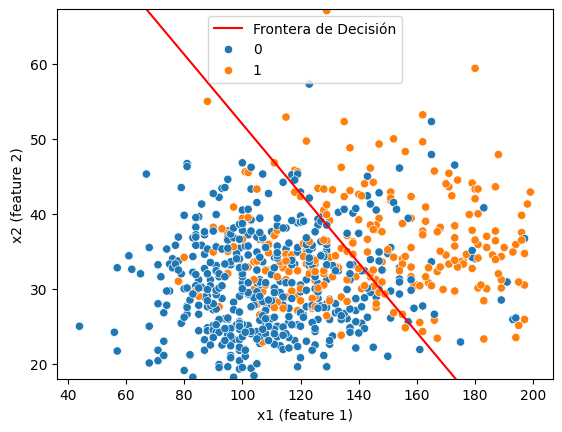

In [94]:
sns.lineplot(x=x_line,
             y=y_line ,
             color='red',
            label='Frontera de Decisión')

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

plt.xlabel('x1 (feature 1)')
plt.ylabel('x2 (feature 2)')
plt.ylim(top = X[:,1].max()+0.2, bottom = X[:,1].min()-0.2)
plt.legend(loc='best');

In [95]:
x_1_surf = np.linspace(X[:,0].min(), X[:,0].max())
x_2_surf = np.linspace(X[:,1].min(), X[:,1].max())
x_1_surf, x_2_surf = np.meshgrid(x_1_surf, x_2_surf)
X_surface = pd.DataFrame({'x1': x_1_surf.ravel(), 'x2': x_2_surf.ravel()})
y_pred_surface_prob = classifier.predict_proba(X_surface)
y_pred_surface = y_pred_surface_prob[:, 1]

c:\Users\Fer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


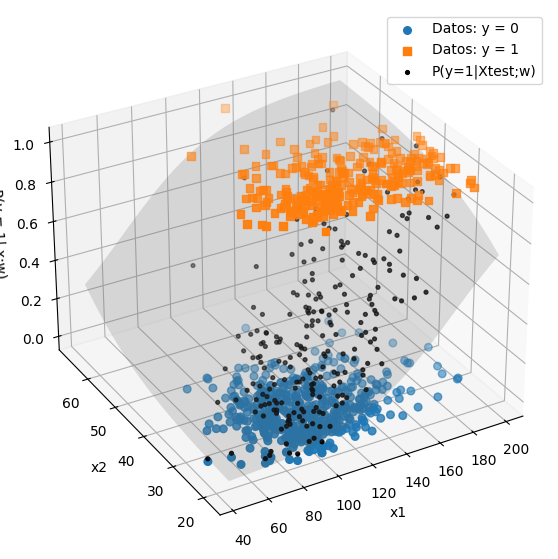

In [96]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection = '3d')
ax.plot_surface(x_1_surf, x_2_surf, y_pred_surface.reshape(x_1_surf.shape),
                rstride=1000,
                cstride=1000,
                color='gray',
                alpha = 0.2)

ax.scatter(X[y == 0, 0], X[y == 0, 1], 0, c='tab:blue', s=30,
            label='Datos: y = 0', marker='o')
ax.scatter(X[y == 1, 0], X[y == 1, 1], 1, c='tab:orange', s=30,
            label='Datos: y = 1', marker='s')
ax.scatter(X_test[:,0], X_test[:,1], probabilidades[:,1], c='black', s=30,
            label='P(y=1|Xtest;w)', marker='.')
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_zlabel('P(y = 1| x;w)')
ax.view_init(30, 240)


plt.legend(loc='best')
plt.show()

Metricas: $$ Accuracy = \frac{valores correctos}{total}$$


$$ Precision = \frac{verdaderos positivos}{verdaderos positivos + falsos positivos}$$

$$ Recall = \frac{verdaderos positivos}{verdaderos positivos + falsos negativos}$$

$$ Fscore = 2 * \frac{precision * recall }{precision + recall}$$

Matriz de confusión:

|.| Prediccion 0| Prediccion 1
|:-| :- | -:
|Real 0| verdadero negativo | Falso positivo
|Real 1| falso negativo | verdadero positivo

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test, y_pred_test)

array([[135,  17],
       [ 32,  42]], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_test)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_test)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_test)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_test)))

Accuracy Score : 0.7831858407079646
Precision Score : 0.711864406779661
Recall Score : 0.5675675675675675
F1 Score : 0.631578947368421


###El modelo tiene bajo valor de Score

##Modelo de KKN

###Utilizaremos la clase `KNeighborsClassifier` de sklearn con **los datos de entrenamiento**  para ajustar los parametros del modelo:

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn = KNeighborsClassifier(n_neighbors=5)

###Entrenamiento del modelo

In [102]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

###Score de los valores de entrenamiento

In [103]:
knn.score(X_train, y_train)

0.8079847908745247

###Score de los valores de test 

In [104]:
knn.score(X_test, y_test)

0.7256637168141593

##Grafico de los datos

In [105]:
x_1_surf = np.linspace(X[:,0].min(), X[:,0].max())
x_2_surf = np.linspace(X[:,1].min(), X[:,1].max())
x_1_surf, x_2_surf = np.meshgrid(x_1_surf, x_2_surf)
X_surface = pd.DataFrame({'x1': x_1_surf.ravel(), 'x2': x_2_surf.ravel()})
y_pred_surface = knn.predict_proba(X_surface.values)[:, 1].reshape(x_1_surf.shape)

Prediccion:  [0]


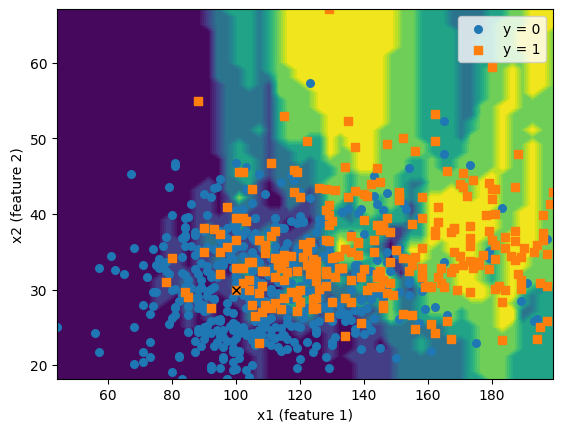

In [106]:
plt.contourf(x_1_surf, x_2_surf, y_pred_surface, 25,
                      vmin=0, vmax=1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='tab:blue', s=30,
            label='y = 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='tab:orange', s=30,
            label='y = 1', marker='s')
plt.plot(100,30, marker = 'x', color='black') #Es un punto para probar el modelo
plt.xlabel('x1 (feature 1)')
plt.ylabel('x2 (feature 2)')
plt.legend(loc='best');
print('Prediccion: ', knn.predict([[1,0]]));

##Árboles de decisión

In [107]:
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X=df_cleaned.iloc[:,1:]
y=df_cleaned.Outcome

###Split dataset

In [110]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=10)

###Creación del preprocesador

In [111]:
preprocessor = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Glucose', 'BMI'])
)

In [112]:
preprocessor.fit_transform(X_train)

array([[ 56.,   5.],
       [ 40.,  31.],
       [ 40., 162.],
       ...,
       [ 65., 101.],
       [108.,  80.],
       [ 59.,  21.]])

In [113]:
X_train_transform = pd.DataFrame(preprocessor.fit_transform(X_train))

###Aplicación del modelo

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
model_tree = DecisionTreeClassifier()

In [116]:
X_train_transform  #es el nuevo df que voy a utilizar (esta en pandas)

,0,1
0,56.0,5.0
1,40.0,31.0
2,40.0,162.0
3,83.0,172.0
4,56.0,123.0
...,...,...
521,30.0,193.0
522,114.0,125.0
523,65.0,101.0
524,108.0,80.0


In [117]:
model_tree.fit(X_train_transform,y_train)

DecisionTreeClassifier()

###Score del modelo

In [118]:
model_tree.score(X_train_transform,y_train)

0.9904942965779467

###Gráfico del modelo

In [119]:
from sklearn import tree

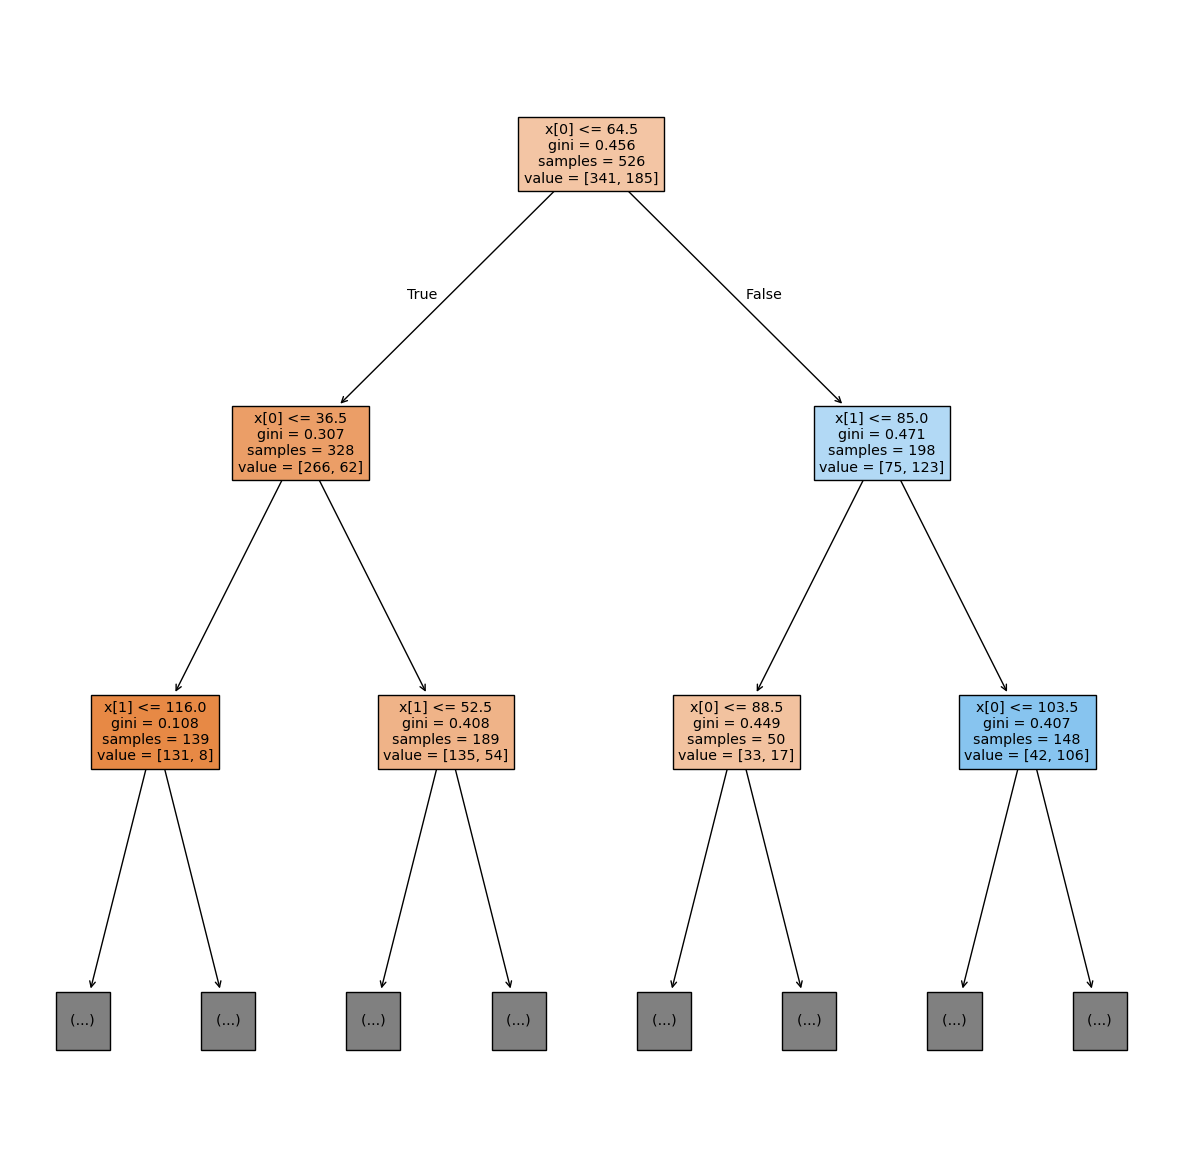

In [120]:
plt.figure(figsize = (15,15))
_= tree.plot_tree(model_tree, filled = True, max_depth = 2)

In [121]:
X_test.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
678,121,52,0,0,36.0,0.127,25,1
302,77,82,41,42,35.8,0.156,35,0
28,145,82,19,110,22.2,0.245,57,0
167,120,68,0,0,29.6,0.709,34,0
505,75,82,0,0,33.3,0.263,38,0


In [122]:
X_test_transform = pd.DataFrame(preprocessor.fit_transform(X_test))

In [123]:
X_test_transform

,0,1
0,45.0,96.0
1,6.0,94.0
2,67.0,9.0
3,44.0,57.0
4,4.0,78.0
...,...,...
221,75.0,91.0
222,64.0,128.0
223,72.0,32.0
224,20.0,15.0


In [124]:
y_pred = model_tree.predict(X_test_transform)

###Métricas

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[131,  16],
       [ 57,  22]], dtype=int64)

In [126]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.6769911504424779
Precision Score : 0.5789473684210527
Recall Score : 0.27848101265822783
F1 Score : 0.37606837606837606


###El modelo tiene un bajo Score

###Pipeline de entrenamiento

In [127]:
from sklearn.pipeline import make_pipeline

In [128]:
modeler = make_pipeline(preprocessor, DecisionTreeClassifier())

In [129]:
modeler.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Glucose', 'BMI'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

###Se obtienen valores similares de score al utilizar pipelines

In [130]:
modeler.score(X_train, y_train)

0.9904942965779467

In [131]:
modeler.score(X_test, y_test)

0.6415929203539823

###Matriz de confusión

In [132]:
y_pred=modeler.predict(X_test)

In [133]:
confusion_matrix(y_test, y_pred)

array([[120,  27],
       [ 54,  25]], dtype=int64)

##Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rondom_model = RandomForestClassifier(n_estimators = 5)  #ver que se usaron 5 arboles (usar 3,5 o 7)

In [136]:
rondom_model.fit(X_train_transform , y_train)

RandomForestClassifier(n_estimators=5)

In [137]:
rondom_model.score(X_train_transform, y_train)

0.9505703422053232

In [138]:
rondom_model.score(X_test_transform, y_test)

0.7079646017699115